In [2]:
%matplotlib inline 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

datos = pd.read_csv("nhanes_2015_2016.csv")
datos.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [2]:
# Distribución de frecuencias, indica el numero de registros (filas) en nuestro
# dataframe

datos = datos.rename(columns=({"DMDEDUC2":"NIVEL_EDUCATIVO","BMXWT":"PESO_CORPORAL",
                              "BPXSY1":"P_ARTERIAL_SIST_1","BPXSY2":"P_ARTERIAL_SIST_2",
                               "BPXDI1":"P_ARTERIAL_DIAS_1","BPXSY2":"P_ARTERIAL_DIAS_2",
                               "RIDAGEYR":"EDAD"
                              
                              }))
datos.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,EDAD,RIDRETH1,DMDCITZN,NIVEL_EDUCATIVO,...,P_ARTERIAL_DIAS_2,BPXDI2,PESO_CORPORAL,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
datos["EDUCACION"] = datos.NIVEL_EDUCATIVO.replace({
    1:"Noveno Grado",
    2:"Noveno a Undecimo Grado",
    3:"Bachiller",
    4:"Universidad",
    5:"No Indica",
    9:"Desconocido"  
    
}) 
datos.value_counts().sort_values(ascending=False)

SEQN   ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  EDAD  RIDRETH1  DMDCITZN  NIVEL_EDUCATIVO  DMDMARTL  DMDHHSIZ  WTINT2YR   SDMVPSU  SDMVSTRA  INDFMPIR  P_ARTERIAL_SIST_1  P_ARTERIAL_DIAS_1  P_ARTERIAL_DIAS_2  BPXDI2  PESO_CORPORAL  BMXHT  BMXBMI  BMXLEG  BMXARML  BMXARMC  BMXWAIST  HIQ210  EDUCACION  
83735  2.0     1.0     1.0     2       2         56    3         1.0       5.0              6.0       1         102718.00  1        131       5.00      132.0              72.0               134.0              68.0    109.8          160.9  42.4    38.5    37.7     38.3     110.1     2.0     No Indica      1
86013  2.0     1.0     1.0     1       2         64    2         2.0       5.0              3.0       3         7791.99    1        124       3.48      122.0              74.0               126.0              78.0    76.4           168.6  26.9    38.1    37.2     32.2     96.2      2.0     No Indica      1
84295  2.0     1.0     1.0     1       2         58    5         1.0       5.0   

In [4]:
a = datos
datos["NIVEL_EDUCATIVO"] = datos.NIVEL_EDUCATIVO.replace({
    1:"Noveno Grado",
    2:"Noveno a Undecimo Grado",
    3:"Bachiller",
    4:"Universidad",
    5:"No Indica",
    9:"Desconocido"  
    
}) 

pd.isnull(a.NIVEL_EDUCATIVO).sum() # datos vacios tipo NaN

261

In [5]:
contador = 0
for i in range(len(a.NIVEL_EDUCATIVO)):
    
    if pd.isnull(a.NIVEL_EDUCATIVO[i]) ==  True:
        print(a.NIVEL_EDUCATIVO.index[i])
        contador += 1
        
print("datos vacios tipos nan son ",contador)        
        
    

8
16
54
59
67
86
104
171
172
230
274
278
316
371
375
383
393
404
413
420
425
455
464
487
541
555
568
575
625
630
632
683
726
741
752
835
864
886
902
912
965
968
970
1024
1041
1065
1077
1091
1096
1103
1117
1193
1195
1213
1230
1243
1271
1325
1387
1388
1427
1447
1509
1511
1522
1535
1578
1620
1634
1655
1658
1660
1718
1739
1794
1800
1801
1802
1809
1819
1830
1923
1960
1962
1979
2009
2019
2021
2040
2071
2081
2187
2193
2210
2221
2239
2260
2279
2304
2317
2338
2339
2345
2379
2404
2408
2502
2518
2521
2524
2574
2578
2618
2626
2635
2713
2748
2770
2805
2826
2855
2874
2880
2915
2927
2937
2944
2950
2976
2978
2983
2987
3000
3019
3046
3089
3102
3150
3184
3188
3193
3221
3227
3234
3242
3262
3374
3417
3446
3472
3487
3489
3516
3597
3607
3620
3625
3637
3699
3783
3786
3787
3789
3809
3817
3827
3831
3848
3877
3888
3912
3945
3950
3971
3983
3996
4011
4014
4075
4077
4080
4122
4146
4150
4196
4197
4198
4204
4215
4247
4331
4341
4348
4349
4351
4371
4407
4417
4435
4491
4524
4529
4550
4552
4590
4596
4621
4623
4628
4643


In [6]:
a.NIVEL_EDUCATIVO.value_counts()

Universidad                1621
No Indica                  1366
Bachiller                  1186
Noveno Grado                655
Noveno a Undecimo Grado     643
Desconocido                   3
Name: NIVEL_EDUCATIVO, dtype: int64

In [7]:
pd.isnull(a.NIVEL_EDUCATIVO)

0       False
1       False
2       False
3       False
4       False
        ...  
5730    False
5731    False
5732    False
5733    False
5734    False
Name: NIVEL_EDUCATIVO, Length: 5735, dtype: bool

In [8]:
# creando columnas nuevas

datos["SEXO"] = datos.RIAGENDR.replace({1:"Mujer",2:"Hombre"})

datos

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,EDAD,RIDRETH1,DMDCITZN,NIVEL_EDUCATIVO,...,PESO_CORPORAL,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,EDUCACION,SEXO
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,No Indica,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,No Indica,Mujer
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,Bachiller,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Bachiller,Mujer
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,Bachiller,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Bachiller,Mujer
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,No Indica,...,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,No Indica,Hombre
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,Universidad,...,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Universidad,Hombre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,Bachiller,...,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0,Bachiller,Hombre
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,No Indica,...,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0,No Indica,Mujer
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,Universidad,...,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0,Universidad,Hombre
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,Noveno Grado,...,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0,Noveno Grado,Mujer


In [9]:
# porcentajes - tabla de frecuencias

datos.NIVEL_EDUCATIVO.value_counts(normalize=True)*100

Universidad                29.612715
No Indica                  24.954330
Bachiller                  21.666058
Noveno Grado               11.965656
Noveno a Undecimo Grado    11.746438
Desconocido                 0.054805
Name: NIVEL_EDUCATIVO, dtype: float64

In [10]:
datos.SEXO.value_counts(normalize=True)*100

Hombre    51.891892
Mujer     48.108108
Name: SEXO, dtype: float64

In [11]:
datos.SEXO.count()

5735

In [12]:
datos.NIVEL_EDUCATIVO.dropna().count()
datos.NIVEL_EDUCATIVO.dropna().describe()

count            5474
unique              6
top       Universidad
freq             1621
Name: NIVEL_EDUCATIVO, dtype: object

In [13]:
datos.PESO_CORPORAL.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: PESO_CORPORAL, dtype: float64

A continuación, calculamos la proporción de sujetos de NHANES que son prehipertensos en función de la presión arterial diastólica.

In [14]:
import numpy as np

a =((datos.BPXDI1 >=80) & (datos.BPXDI2 <=89))
a.mean()

AttributeError: 'DataFrame' object has no attribute 'BPXDI1'

In [ ]:
b = ((datos.BPXDI1 >= 80) & (datos.BPXDI2 <= 89))
b.mean()

In [ ]:
np.mean((datos.BPXDI1 >= 80) & (datos.BPXDI2 <= 89))

In [ ]:
prueba_promedio = [datos["BPXDI1"],datos["BPXDI2"]]
np.mean((prueba_promedio[0] >= 80)&(prueba_promedio[1]<=89))

In [ ]:
np.mean((datos.SEXO=="Mujer") &(BPXDI1))

In [ ]:
datos.SEXO

In [ ]:
a = sns.distplot(x=datos.BMXHT.dropna()) # Estamos gráficando datos sin los datos NAN
b = sns.distplot(x=datos.BMXHT, kde= False)



In [ ]:
sub_datos = datos.loc[:,["BPXSY1","BPXSY2","BPXDI1","BPXDI2"]]

a = sns.boxplot(data=sub_datos)
a.set_title("Hola")

# Esta es una forma de gráficar nuestros datos

In [ ]:
# también podemos hacerlo directamente sobre sns

sns.boxplot(data=datos.loc[:,["BPXSY1","BPXSY2","BPXDI1","BPXDI2"]])

In [15]:
# podemos hacer cortes por edad y por género

datos["Años_Corte"] = pd.cut(datos.RIAGENDR,[18,30,40,50,60,70,80])

#sns.boxplot(data=datos, y="P_ARTERIAL_SIST_1",x="Años_Corte", hue="SEXO")


# se hace un corte de años
# luego se comparan tipo de años los cortes
# finalmente se usa el parametro hue para diferenciar entre dos categorías

In [1]:
# esto mismo se puede hacer haciendo la división por los años

sns.boxplot(data=datos, y="P_ARTERIAL_SIST_1",x="SEXO", hue="Años_Corte")


NameError: name 'sns' is not defined

In [24]:
# recordemos que groupby nos envia una seríe 

datos.groupby(["Años_Corte"]).SEXO.value_counts()



ValueError: operands could not be broadcast together with shape (6,) (0,)

In [ ]:
datos.groupby(["Años_Corte"]).SEXO.size()

In [ ]:

ejemplo = datos.groupby(["Años_Corte","SEXO",])["EDUCACION"].value_counts(normalize=True)
ejemplo = ejemplo.loc[~ejemplo.isin(["Desconocido"]),:]

ejemplo.unstack()

In [ ]:
a = datos.index
type(a)

In [19]:
datos_2 = datos
datos_2.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,EDAD,RIDRETH1,DMDCITZN,NIVEL_EDUCATIVO,...,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,EDUCACION,SEXO,Años_Corte
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,No Indica,...,184.5,27.8,43.3,43.6,35.9,101.1,2.0,No Indica,Mujer,NaN
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,Bachiller,...,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Bachiller,Mujer,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,Bachiller,...,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Bachiller,Mujer,NaN
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,No Indica,...,160.9,42.4,38.5,37.7,38.3,110.1,2.0,No Indica,Hombre,NaN
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,Universidad,...,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Universidad,Hombre,NaN


In [23]:
ejemplo_2 = datos.loc[datos_2.EDUCACION.isin(["Desconocido","No Indica"]),:]
#ejemplo_2 = datos.groupby(["Años_Corte","SEXO",])["EDUCACION"].value_counts(normalize=True)
ejemplo_2.EDUCACION

0       No Indica
3       No Indica
10      No Indica
13      No Indica
14      No Indica
          ...    
5724    No Indica
5725    No Indica
5729    No Indica
5731    No Indica
5734    No Indica
Name: EDUCACION, Length: 1369, dtype: object

In [ ]:
dx = datos.loc[~datos.DMDEDUC2.isin(["Don't know", "Missing"]), :]  # Eliminate rare/missing values
dx = dx.groupby(["Años_Corte", "RIAGENDR"])["DMDEDUC2"]
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

In [21]:
datos.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,EDAD,RIDRETH1,DMDCITZN,NIVEL_EDUCATIVO,...,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,EDUCACION,SEXO,Años_Corte
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,No Indica,...,184.5,27.8,43.3,43.6,35.9,101.1,2.0,No Indica,Mujer,NaN
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,Bachiller,...,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Bachiller,Mujer,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,Bachiller,...,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Bachiller,Mujer,NaN
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,No Indica,...,160.9,42.4,38.5,37.7,38.3,110.1,2.0,No Indica,Hombre,NaN
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,Universidad,...,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Universidad,Hombre,NaN


In [2]:
%matplotlib inline 
import pandas as pd 
import seaborn as sns

datos = pd.read_csv("nhanes_2015_2016.csv")
datos.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Pregunta 1
Vuelva a etiquetar la variable de estado civil DMDMARTL para tener etiquetas de caracteres breves pero informativas. Luego construya una tabla de frecuencia de estos valores para todas las personas, luego solo para mujeres y solo para hombres. Luego construya estas tres tablas de frecuencia usando solo personas cuya edad esté entre 30 y 40 años.

In [3]:
datos.DMDMARTL.value_counts().sort_values(ascending=False)

1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: DMDMARTL, dtype: int64

In [164]:
datos["ESTADO_CIVIL"] = datos.DMDMARTL.replace({
    1:"CASADO",
    2:"VIUDO",
    3:"DIVORCIADO",
    4:"APARTADO",
    5:"NUNCA CASADO",
    6:"UNION_LIBRE",
    77:"RECHAZA",
    99:"NO_SABE"
})

datos["ESTADO_CIVIL"].value_counts()

CASADO          2780
NUNCA CASADO    1004
DIVORCIADO       579
UNION_LIBRE      527
VIUDO            396
APARTADO         186
RECHAZA            2
Name: ESTADO_CIVIL, dtype: int64

In [45]:
a = datos.loc[datos.RIAGENDR.isin([1]),:]
a.ESTADO_CIVIL.value_counts() # imprime solo los datos de las mujeres

CASADO          1477
NUNCA CASADO     484
UNION_LIBRE      265
DIVORCIADO       229
VIUDO            100
APARTADO          68
RECHAZA            1
Name: ESTADO_CIVIL, dtype: int64

In [48]:
a.groupby(["ESTADO_CIVIL"]).RIAGENDR.value_counts().sort_values()

ESTADO_CIVIL  RIAGENDR
RECHAZA       1              1
APARTADO      1             68
VIUDO         1            100
DIVORCIADO    1            229
UNION_LIBRE   1            265
NUNCA CASADO  1            484
CASADO        1           1477
Name: RIAGENDR, dtype: int64

In [63]:
b = datos.loc[datos.RIAGENDR.isin([2]),:]
b.ESTADO_CIVIL.value_counts().sort_values() # imprime los hombres

RECHAZA            1
APARTADO         118
UNION_LIBRE      262
VIUDO            296
DIVORCIADO       350
NUNCA CASADO     520
CASADO          1303
Name: ESTADO_CIVIL, dtype: int64

In [165]:
datos["SEXO"] = datos.RIAGENDR.replace({1:"HOMBRE",2:"MUJER"})
c = datos.loc[(datos.RIDAGEYR >= 20) & (datos.RIDAGEYR <=40)]


c.groupby(["ESTADO_CIVIL"]).SEXO.value_counts().sort_values(ascending=False)

ESTADO_CIVIL  SEXO  
CASADO        MUJER     416
              HOMBRE    362
NUNCA CASADO  MUJER     356
              HOMBRE    351
UNION_LIBRE   MUJER     171
              HOMBRE    167
DIVORCIADO    MUJER      54
APARTADO      MUJER      28
DIVORCIADO    HOMBRE     26
APARTADO      HOMBRE     19
VIUDO         HOMBRE      4
              MUJER       2
RECHAZA       HOMBRE      1
Name: SEXO, dtype: int64

<AxesSubplot:xlabel='RIDAGEYR', ylabel='ESTADO_CIVIL'>

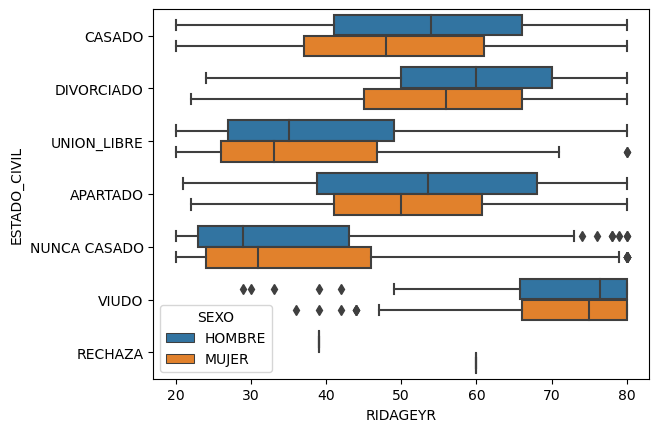

In [116]:

sns.boxplot(data=datos, x="RIDAGEYR", y="ESTADO_CIVIL", hue="SEXO")

Entre generos y estado civil podemos observar que las personas entre un rango de edad entre los 20 y los 40 años, predominan personas que nunca se han casado o que se encuentran en unińo libre, posteriormente vemos que las mujeres tienen a comprometerse antes que los hombres (apartado) pero estando en un rango de edad mucho más elevado, vemos que los hombres tienden a separarse en promedio mucho antes que las mujeres. y que equiparablemente, hay una proporción similar de como enviudan ambos sexos

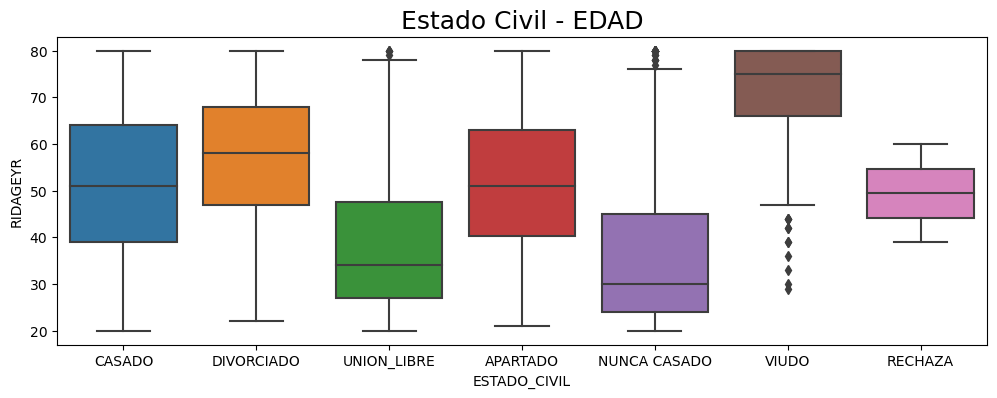

In [117]:

dx = sns.boxplot(data=datos, y="RIDAGEYR", x="ESTADO_CIVIL")
dx.set_title("Estado Civil - EDAD", fontsize = 18)
dx.figure.set_size_inches(12,4)

<AxesSubplot:xlabel='RIDAGEYR', ylabel='ESTADO_CIVIL'>

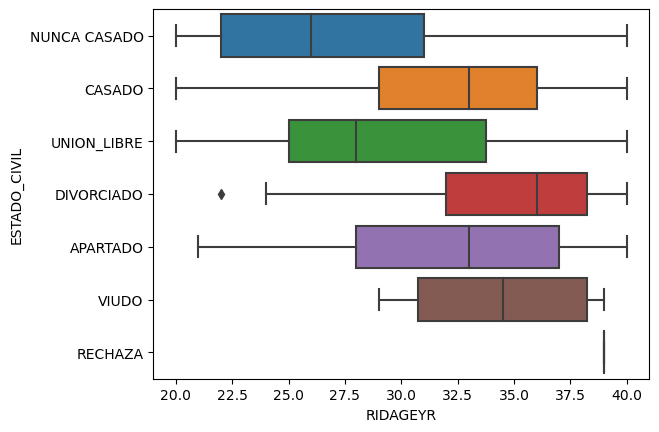

In [118]:
sns.boxplot(data=c, y="ESTADO_CIVIL",x="RIDAGEYR")

## Pregunta 2
Restringiendo a la población femenina, estratifique a los sujetos en franjas de edad no mayores a diez años, y construya la distribución del estado civil dentro de cada franja de edad. Dentro de cada franja de edad, presente la distribución en términos de proporciones que deben sumar 1.

In [166]:
datos["CORTE_EDAD"] = pd.cut(datos.RIDAGEYR,[18,30,40,50,60,70,80])
d = datos.loc[(datos.SEXO == "MUJER"),:]
d = d.groupby(["ESTADO_CIVIL"]).CORTE_EDAD.value_counts(normalize = True).sort_values(ascending=False)
d.unstack()

# MUJERES

,"(18, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
ESTADO_CIVIL,,,,,,
APARTADO,0.093220,0.144068,0.279661,0.228814,0.186441,0.067797
CASADO,0.121259,0.198005,0.221028,0.197237,0.162701,0.099770
DIVORCIADO,0.031429,0.122857,0.197143,0.237143,0.242857,0.168571
NUNCA CASADO,0.498077,0.186538,0.121154,0.080769,0.073077,0.040385
RECHAZA,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
UNION_LIBRE,0.435115,0.217557,0.141221,0.122137,0.072519,0.011450
VIUDO,0.000000,0.006757,0.040541,0.094595,0.219595,0.638514


In [95]:
datos["CORTE_EDAD"] = pd.cut(datos.RIDAGEYR,[18,30,40,50,60,70,80])
d = datos.loc[(datos.SEXO == "HOMBRE"),:]
d = d.groupby(["ESTADO_CIVIL"]).CORTE_EDAD.value_counts(normalize = True).sort_values(ascending=False)
d.unstack()

# HOMBRES

,"(18, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
ESTADO_CIVIL,,,,,,
APARTADO,0.093220,0.144068,0.279661,0.228814,0.186441,0.067797
CASADO,0.121259,0.198005,0.221028,0.197237,0.162701,0.099770
DIVORCIADO,0.031429,0.122857,0.197143,0.237143,0.242857,0.168571
NUNCA CASADO,0.498077,0.186538,0.121154,0.080769,0.073077,0.040385
RECHAZA,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
UNION_LIBRE,0.435115,0.217557,0.141221,0.122137,0.072519,0.011450
VIUDO,0.000000,0.006757,0.040541,0.094595,0.219595,0.638514


Construya un histograma de la distribución de alturas utilizando la variable BMXHT en la muestra NHANES.

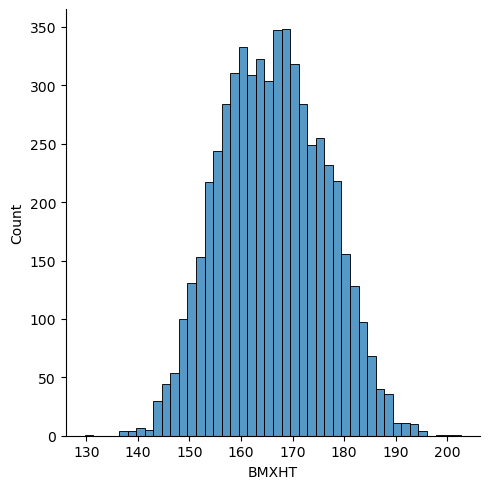

In [121]:
sns.displot(x=datos.BMXHT, kde=False)

Use el argumento bins para distplot para producir histogramas con diferentes números de bins. Evalúe si el valor predeterminado para este argumento da un resultado significativo y comente lo que sucede a medida que la cantidad de contenedores crece excesivamente o es demasiado pequeña.

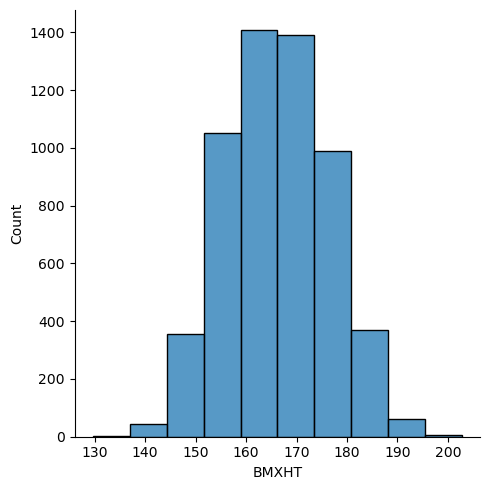

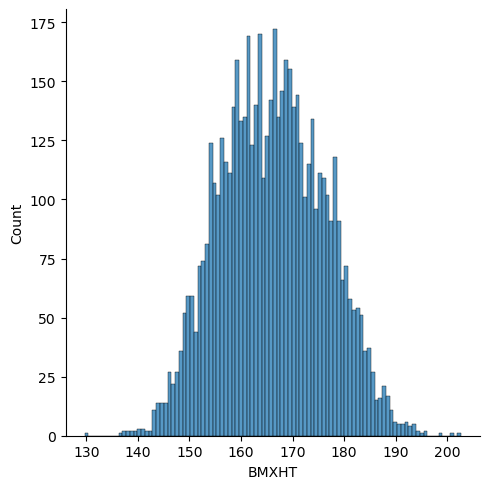

In [122]:
sns.displot(x=datos.BMXHT, bins=10,kde=False)
sns.displot(x=datos.BMXHT, bins=100,kde=False)

Haz histogramas separados para las estaturas de mujeres y hombres, luego haz un diagrama de caja de lado a lado que muestre las estaturas de mujeres y hombres.

/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Altura')

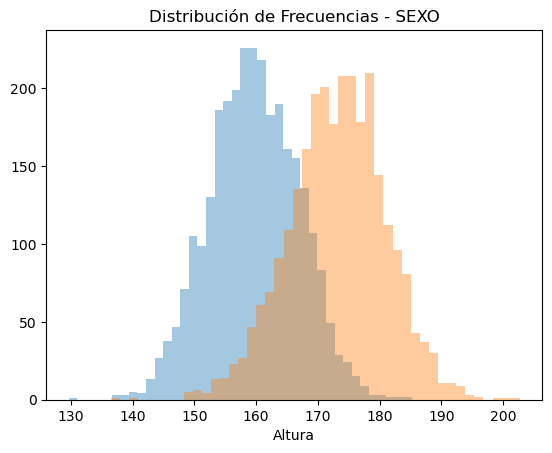

In [123]:
a = datos.loc[(datos.SEXO=="MUJER"),:]
ax= sns.distplot(x=a.BMXHT, kde=False)
a = datos.loc[(datos.SEXO=="HOMBRE"),:]
ax = sns.distplot(x=a.BMXHT, kde=False)
ax.set_title("Distribución de Frecuencias - SEXO")
ax.set_xlabel("Altura")


Text(0.5, 0, 'Altura')

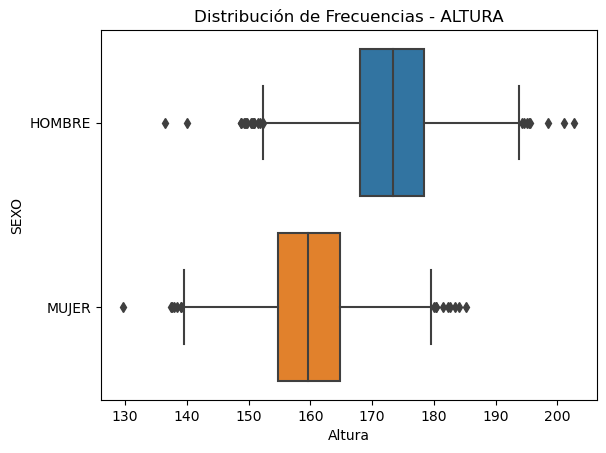

In [125]:
ax = sns.boxplot(x=datos.BMXHT, y=datos.SEXO)
ax.set_title("Distribución de Frecuencias - ALTURA")
ax.set_xlabel("Altura")


Haga un diagrama de caja que muestre la distribución de las diferencias dentro del sujeto entre la primera y la segunda medición de la presión arterial sistólica (BPXSY1 y BPXSY2).


<AxesSubplot:xlabel='DIFERENCIA'>

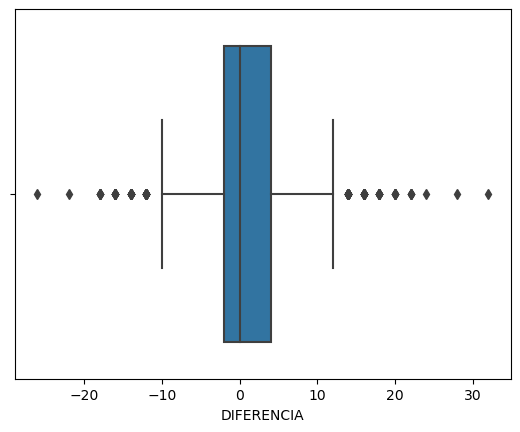

In [127]:
datos["DIFERENCIA"] = datos.BPXSY1 - datos.BPXSY2
sns.boxplot(x=datos.DIFERENCIA)

Que proporcion de personas tienen la segunda toma de la presion más baja que la primera

In [131]:


proporcion =  np.mean((datos.BPXSY1 > datos.BPXSY2))
proporcion

0.42946817785527464

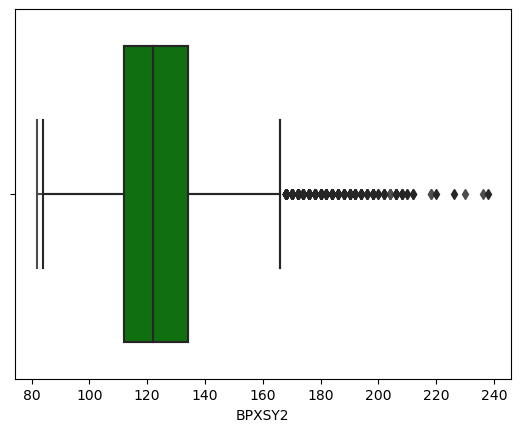

In [144]:
sns.boxplot(x=datos.BPXSY1,color="yellow")

sns.boxplot(x=datos.BPXSY2,color="green")
plt.show()

In [147]:
datos.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [167]:
datos["NIVEL_EDUCATIVO"] = datos.DMDEDUC2.replace({
    1:"Noveno Grado",
    2:"Noveno a Undecimo Grado",
    3:"Bachiller",
    4:"Universidad",
    5:"No Indica",
    9:"Desconocido"  
    
}) 

a = (datos.groupby(["NIVEL_EDUCATIVO"]).DMDHHSIZ.value_counts(normalize=True))*100
a.unstack()

DMDHHSIZ,1,2,3,4,5,6,7
NIVEL_EDUCATIVO,,,,,,,
Bachiller,15.261383,27.065767,17.116358,16.188870,10.961214,6.576728,6.829680
Desconocido,NaN,66.666667,NaN,NaN,33.333333,NaN,NaN
No Indica,14.275256,34.773060,19.399707,16.544656,9.516837,2.928258,2.562225
Noveno Grado,10.992366,22.442748,14.656489,13.282443,14.809160,10.839695,12.977099
Noveno a Undecimo Grado,11.664075,22.239502,16.329705,15.241058,14.618974,11.353033,8.553655
Universidad,15.114127,26.896977,19.309068,16.903146,12.214682,5.058606,4.503393


In [168]:
datos.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'ESTADO_CIVIL', 'SEXO', 'CORTE_EDAD',
       'NIVEL_EDUCATIVO'],
      dtype='object')


Restringir la muestra a personas entre 30 y 40 años de edad. Luego calcule el tamaño medio del hogar para mujeres y hombres dentro de cada nivel educativo.

In [182]:
dx = datos.loc[(datos.RIDAGEYR >= 30) & (datos.RIDAGEYR<= 40 ) ,:]
women = datos.groupby(["NIVEL_EDUCATIVO","SEXO"]).DMDHHSIZ.mean()
women

NIVEL_EDUCATIVO          SEXO  
Bachiller                HOMBRE    3.273632
                         MUJER     3.277873
Desconocido              HOMBRE    3.500000
                         MUJER     2.000000
No Indica                HOMBRE    2.850539
                         MUJER     2.969317
Noveno Grado             HOMBRE    3.826797
                         MUJER     3.830946
Noveno a Undecimo Grado  HOMBRE    3.639205
                         MUJER     3.711340
Universidad              HOMBRE    3.108146
                         MUJER     3.225523
Name: DMDHHSIZ, dtype: float64

In [194]:
da = datos.loc[datos.NIVEL_EDUCATIVO.isin(["Bachiller"]),:]
mujer = da.loc[(da.SEXO=="MUJER"),:]

mujer.groupby("NIVEL_EDUCATIVO").DMDHHSIZ.mean()

NIVEL_EDUCATIVO
Bachiller    3.277873
Name: DMDHHSIZ, dtype: float64

Los participantes se pueden agrupar en "unidades de varianza hechas" (MVU) en función de cada combinación de las variables SDMVSTRA y SDMVPSU. Calcule la edad media (RIDAGEYR), la altura (BMXHT) y el IMC (BMXBMI) para cada sexo (RIAGENDR), dentro de cada MVU, e informe la relación entre la media más grande y la más pequeña (por ejemplo, para la altura) en las MVU.

In [202]:
# varianza

varianza = datos["SDMVSTRA"].var()
print(varianza)
varianza = datos["SDMVPSU"].var()
varianza

18.014982625548203


0.2498967142260763

In [39]:
datos.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [28]:
mujer = datos.loc[(datos.RIAGENDR == 2),:]

mujer.groupby(["SDMVSTRA","SDMVPSU"]).RIDAGEYR.mean().agg([max,min])

max    55.638462
min    42.541667
Name: RIDAGEYR, dtype: float64

In [29]:
hombre = datos.loc[(datos.RIAGENDR == 1),:]

hombre.groupby(["SDMVSTRA","SDMVPSU"]).RIDAGEYR.mean().agg([max,min])

max    55.165289
min    42.063158
Name: RIDAGEYR, dtype: float64

In [38]:
print("hombre \n ",hombre.groupby(["SDMVSTRA","SDMVPSU"]).BMXHT.mean().agg([max,min]))
print("mujer \n ",mujer.groupby(["SDMVSTRA","SDMVPSU"]).BMXHT.mean().agg([max,min]))

hombre 
  max    176.974157
min    169.325000
Name: BMXHT, dtype: float64
mujer 
  max    162.853521
min    155.402041
Name: BMXHT, dtype: float64


In [50]:
datos["IMC"] = (datos.BMXBMI/(datos.BMXHT*datos.BMXHT))
hombre = datos.loc[(datos.RIAGENDR == 1),:]
mujer = datos.loc[(datos.RIAGENDR == 1),:]

print("hombre \n ",hombre.groupby(["SDMVSTRA","SDMVPSU"]).IMC.mean().agg([max,min]))
print("mujer \n ",mujer.groupby(["SDMVSTRA","SDMVPSU"]).IMC.mean().agg([max,min]))


hombre 
  max    0.001115
min    0.000864
Name: IMC, dtype: float64
mujer 
  max    0.001115
min    0.000864
Name: IMC, dtype: float64


In [46]:
mujer.BMXHT

3       160.9
4       164.9
5       150.0
7       151.3
12      163.6
        ...  
5724    166.9
5727    151.9
5730    165.8
5732    152.2
5734    165.0
Name: BMXHT, Length: 2976, dtype: float64

In [60]:
A=datos.BMXBMI.loc[0]
B=datos.BMXHT.loc[0]
print(A,B)

(A/(B*B))

27.8 184.5


0.0008166802535234024

Calcule el rango intercuartílico (IQR) para la edad, la altura y el IMC para cada sexo y cada MVU. Informe la relación entre el IQR más grande y el más pequeño en las MVU.

In [84]:
datos.BMXBMI.quantile(0.75) - datos.BMXBMI.quantile(0.25)

8.7

In [82]:
a = datos.BMXBMI.quantile([0.75-0.25])
a

0.5    28.3
Name: BMXBMI, dtype: float64

In [77]:
33-24.3

8.7

In [95]:
edad = datos.groupby(["SDMVSTRA","SDMVPSU"]).RIDAGEYR.mean().quantile(0.75) - datos.RIDAGEYR
edad

18.686432773712156

In [90]:
a = datos.RIDAGEYR.quantile(0.25)
b = datos.RIDAGEYR.quantile(0.75)

b - a

31.0

In [139]:
datos["iqr_años"] = datos.RIDAGEYR.quantile(0.75) - datos.RIDAGEYR.quantile(0.25)
print(datos.iqr_años)

import scipy.stats as stats

print(stats.iqr(datos.RIDAGEYR))
datos.head()

0       31.0
1       31.0
2       31.0
3       31.0
4       31.0
        ... 
5730    31.0
5731    31.0
5732    31.0
5733    31.0
5734    31.0
Name: iqr_años, Length: 5735, dtype: float64
31.0


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,IMC,iqr_años
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,0.000817,31.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,0.001048,31.0
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,0.000995,31.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,0.001638,31.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,0.000747,31.0


In [147]:
mujer = datos.loc[(datos.RIAGENDR == 2),:]
hombre = datos.loc[(datos.RIAGENDR == 1),:]


años_mujer = mujer.groupby(["SDMVSTRA","SDMVPSU"]).RIDAGEYR.agg([stats.iqr])
print(años_mujer)
print("--"*9)
años_hombre = hombre.groupby(["SDMVSTRA","SDMVPSU"]).RIDAGEYR.agg([stats.iqr])
print(años_hombre)

                    iqr
SDMVSTRA SDMVPSU       
119      1        31.25
         2        33.50
120      1        26.50
         2        25.75
121      1        26.25
         2        26.00
122      1        24.00
         2        25.00
123      1        30.50
         2        34.50
124      1        27.00
         2        23.50
125      1        31.00
         2        32.25
126      1        30.25
         2        31.75
127      1        27.25
         2        30.00
128      1        28.00
         2        22.00
129      1        24.75
         2        26.25
130      1        35.50
         2        30.25
131      1        35.75
         2        24.00
132      1        30.00
         2        33.00
133      1        34.00
         2        28.50
------------------
                    iqr
SDMVSTRA SDMVPSU       
119      1        29.75
         2        29.00
120      1        23.75
         2        26.00
121      1        34.50
         2        25.50
122      1        29.

In [142]:
import pandas as pd
from scipy.stats import iqr

df = pd.read_csv("nhanes_2015_2016.csv")

# create a new "grouped" dataset
BMXBMIGrp = df[df.RIDAGEYR.notna()].groupby(['SDMVSTRA', 'SDMVPSU'])

# print a heading
print("\nBMXBMI GROUPED")

# print the "grouped" IQR
print(BMXBMIGrp["RIDAGEYR"].agg(iqr))


BMXBMI GROUPED
SDMVSTRA  SDMVPSU
119       1          31.25
          2          33.00
120       1          26.00
          2          27.00
121       1          31.50
          2          25.00
122       1          27.00
          2          28.75
123       1          30.00
          2          33.00
124       1          30.00
          2          26.00
125       1          29.50
          2          33.75
126       1          33.00
          2          32.50
127       1          29.00
          2          27.75
128       1          30.00
          2          24.00
129       1          22.25
          2          28.75
130       1          35.25
          2          29.00
131       1          36.00
          2          27.00
132       1          25.00
          2          35.00
133       1          33.75
          2          31.00
Name: RIDAGEYR, dtype: float64


En este cuaderno, le pediremos que busque resúmenes numéricos para un determinado conjunto de datos. Utilizará los valores de lo que encuentre en esta tarea para responder preguntas en el cuestionario que sigue (hemos notado dónde se solicitarán valores específicos en el cuestionario, para que pueda registrarlos).

También le pediremos que cree algunas de las tramas que ha visto en lecciones anteriores.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

path = "nhanes_2015_2016.csv"
datos = pd.read_csv(path)

In [3]:
datos.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0



¿Cuántas filas puedes ver cuando no pones un argumento en el método anterior?
¿Cuántas filas puedes ver si usas un int como argumento?
¿Puedes usar un flotador como argumento?

In [12]:
datos.index == int 
datos.columns == float

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

Consideremos solo la característica (o variable) 'BPXSY2

In [13]:
datos.BPXSY2

0       124.0
1       140.0
2       132.0
3       134.0
4       114.0
        ...  
5730    112.0
5731    116.0
5732    146.0
5733    106.0
5734    114.0
Name: BPXSY2, Length: 5735, dtype: float64

Resúmenes numéricos

Encuentre la media (tenga en cuenta esto para el cuestionario que sigue

In [14]:
datos.BPXSY2.mean()

124.78301716350497

In [17]:
datos.BPXSY2.dropna().mean()

124.78301716350497

.dropna()
Para asegurarnos de que no estamos tratando los datos faltantes de una manera que no queremos, sigamos adelante y eliminemos todos los nans de nuestra Serie 

Encuentra el:
Mediana
máx.
mínimo
Desviación Estándar
Diferencia

Puede implementar cualquiera de estos desde python base (es decir, sin ninguno de los paquetes importados), pero hay funciones simples y con nombres intuitivos en la biblioteca numpy para todos estos. También podría usar el hecho de que 'bp' no es solo una lista, sino que es pandas.Series. Puede encontrar los atributos y métodos de pandas.Series

Una gran parte de la programación es poder encontrar las funciones que necesita y comprender el formato de la documentación para que pueda implementar el código usted mismo, por lo que le recomendamos que busque en Internet cuando no esté seguro.

Ejemplo:
Encuentre la diferencia de un elemento en 'pb' en comparación con el elemento anterior en

In [18]:
datos.BPXSY2.dropna().describe()

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

In [22]:
# ver metodo series

datos_df = datos.BPXSY2.dropna()

prueba_diff = datos_df.diff()
print(prueba_diff)

"""
El método.diff() sirve para hallar diferencias entre datos. Si se usa sin ningún argumento, 
lo que hace es computar 
la diferencia entre el dato de una columna y el mismo dato de la fila inmediatamente anterior.

Lo que hace es hacer la diferencia con el dato de la filia anterior, entonces en la posición 0 
lo que muestra es que es un NAN porque no habia un dato anterior, la posición 1 respecto a la 0 hay una diferencia
de 16 y así sucesivamente se generan las comparaciones, lo que esta haciendo es que esta haciendo una resta.

"""

0        NaN
1       16.0
2       -8.0
3        2.0
4      -20.0
        ... 
5730     0.0
5731     4.0
5732    30.0
5733   -40.0
5734     8.0
Name: BPXSY2, Length: 5535, dtype: float64


'\nEl método.diff() sirve para hallar diferencias entre datos. Si se usa sin ningún argumento, \nlo que hace es computar \nla diferencia entre el dato de una columna y el mismo dato de la fila inmediatamente anterior.\n\nLo que hace es hacer la diferencia con el dato de la filia anterior, entonces en la posición 0 \nlo que muestra es que es un NAN porque no habia un dato anterior, la posición 1 respecto a la 0 hay una diferencia\nde 16 y así sucesivamente se generan las comparaciones, lo que esta haciendo es que esta haciendo una resta.\n\n'

In [24]:
print(prueba_diff.values) 

# esto mostraría solo los valores de la serie y no su indice 

[ nan  16.  -8. ...  30. -40.   8.]


In [25]:
datos_df.median()

122.0

In [31]:
datos_df.agg([min,max])

min     84.0
max    238.0
Name: BPXSY2, dtype: float64

In [29]:
datos_df.std()

18.527011720295047

In [32]:
datos_df.var()

343.25016328395003

In [34]:
stats.iqr(datos_df)

22.0

Hacer un histograma de nuestros datos  usando la biblioteca seaborn que importamos como 'sns'

/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Titulo')

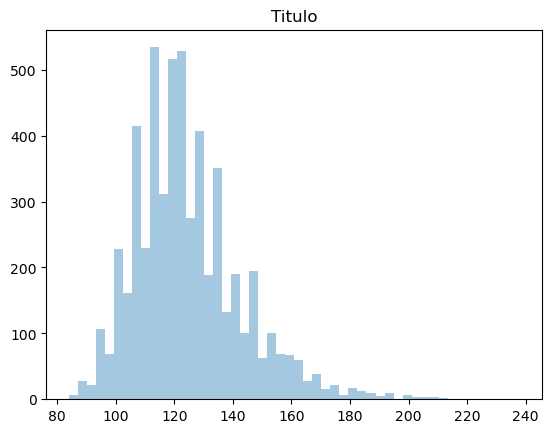

In [46]:
dx = sns.distplot(x=datos_df, kde=False)
dx.set_title("Titulo")

Para crear labels

.set(title='your_title', xlabel='your_x_label', ylabel='your_y_label')
or just

.set(title='your_title')


Haz un diagrama de caja de nuestros datos 'bp' usando la biblioteca seaborn. ¡Asegúrate de que tenga un título y etiquetas!

Text(0.5, 1.0, 'Diagrama de Caja')

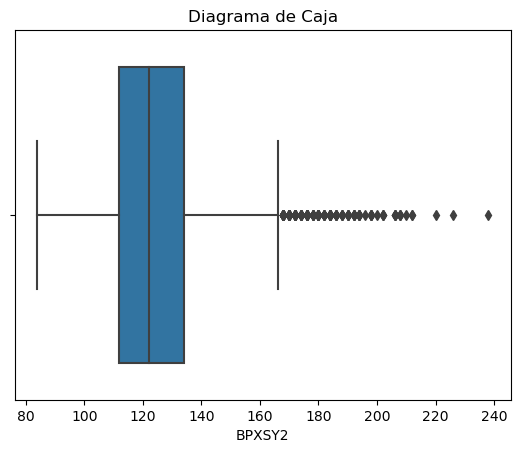

In [48]:
dx = sns.boxplot(data=datos_df, x=datos_df)
dx.set_title("Diagrama de Caja")

# DATOS MULTIVARIADOS CATEGORICOS O CUALITATIVOS


En este caso cuando hablamos de Bivariado hablamos de dos variables, pero cuando hablamós de más variables estamos refiriendonos a datos multivariados.

Los datos categoricos o cualitativos multivariados nos permiten generar una comparación respecto a diferentes variables, podemos observar el numero de registros de una persona con un tipo de nivel de educación, comparandolo con su género y rango de edad, estos elementos con un gráfico de barras o con un gráfico de mosaicos nos permitirán ver los cambios que pueden darse en determinada variable según la composición, podemos ver si hay más participación en un grado academico o nivel escolar por el género y al mismo tiempo si esto varia según el rango de edad.


# DATOS MULTIVARIADOS CUANTITATIVOS

Los datos multivariados cuantitativos nos permiten observar la correlación que existen entre dos variables, si esta es positiva o negativa, si esta es fuerte, moderada o debil, si esta es lineal, cuadratica o no asociación, todo esto nos permite saber si existe una correlación entre los datos, **pero es bueno entender, que una correlación no indica causalidad** podemos ver que hay correlación de que las personas que aumentan la presión arterial y la edad, pero esto no significa **NECESARIAMENTE** que por la edad aumente la presión arterial. 

A este tipo de asociación o correlación, se le llama correlación de **PEARSON**


In [8]:
datos.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [9]:
datos.describe()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
count,5735.000000,5208.000000,1731.000000,3379.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,5474.000000,...,5535.000000,5535.000000,5666.000000,5673.000000,5662.000000,5345.000000,5427.000000,5427.000000,5368.000000,4732.000000
mean,88678.583435,1.336406,1.587522,3.911512,1.607149,1.518919,48.052310,3.042371,1.185385,3.441725,...,124.783017,69.346703,81.342676,166.142834,29.382197,38.576782,37.146987,33.112235,99.567213,1.915469
std,2882.139237,0.505514,0.623940,34.341839,0.571975,0.499686,18.431011,1.296793,0.491678,1.309700,...,18.527012,13.022829,21.764409,10.079264,7.095921,3.873018,2.800784,5.268027,16.844109,0.414845
min,83732.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,...,84.000000,0.000000,32.400000,129.700000,14.500000,26.000000,28.200000,17.100000,58.700000,1.000000
25%,86164.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,2.000000,1.000000,3.000000,...,112.000000,62.000000,65.900000,158.700000,24.300000,36.000000,35.200000,29.500000,87.600000,2.000000
50%,88668.000000,1.000000,2.000000,2.000000,2.000000,2.000000,48.000000,3.000000,1.000000,4.000000,...,122.000000,70.000000,78.200000,166.000000,28.300000,38.600000,37.100000,32.700000,98.300000,2.000000
75%,91178.500000,2.000000,2.000000,3.000000,2.000000,2.000000,63.000000,4.000000,1.000000,4.750000,...,134.000000,78.000000,92.700000,173.500000,33.000000,41.200000,39.000000,36.200000,109.300000,2.000000
max,93702.000000,9.000000,9.000000,999.000000,9.000000,2.000000,80.000000,5.000000,9.000000,9.000000,...,238.000000,144.000000,198.900000,202.700000,67.300000,51.500000,47.400000,58.400000,171.600000,9.000000


In [3]:
import pandas as pd


datos = pd.read_csv("nhanes_2015_2016.csv")

# para leer todo las columnas agregamos

pd.set_option("display.max_columns",28) 

In [5]:
datos.head()
# ahora no se omite ninguna columna

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [8]:
a = datos.SEQN.values
for i in range(len(a)):
    print(a[i])

83732
83733
83734
83735
83736
83737
83741
83742
83743
83744
83747
83750
83752
83754
83755
83757
83759
83761
83762
83767
83769
83773
83775
83776
83777
83781
83784
83785
83786
83787
83788
83789
83790
83791
83799
83801
83802
83803
83809
83812
83813
83816
83817
83818
83820
83821
83822
83823
83824
83827
83828
83829
83832
83834
83836
83837
83843
83844
83845
83847
83849
83851
83853
83854
83856
83857
83860
83862
83863
83865
83866
83869
83870
83871
83872
83874
83875
83876
83880
83881
83883
83884
83885
83886
83887
83889
83890
83891
83894
83895
83897
83898
83899
83900
83902
83903
83907
83908
83909
83910
83911
83913
83914
83915
83919
83920
83924
83925
83926
83928
83931
83932
83933
83934
83935
83937
83938
83941
83944
83946
83947
83949
83950
83951
83953
83954
83955
83958
83959
83961
83962
83963
83964
83965
83966
83967
83969
83971
83973
83975
83976
83977
83982
83985
83986
83987
83988
83989
83990
83992
83993
83994
83995
83996
83998
83999
84001
84002
84005
84006
84008
84010
84011
84012
84014
84015
8401